In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [5]:
# Load Seaborn 'tips' dataset
data = sns.load_dataset('tips')

# Introduce some missing values for demonstration (optional)
data.loc[0:5, 'total_bill'] = np.nan


In [6]:
# 1. Handle Missing Values

# Using a loop to fill missing values with the median
for column in data.columns:
    if data[column].isnull().any():
        median_value = data[column].median()
        # Use `loc` for assignment to avoid chained assignment issues
        data.loc[data[column].isnull(), column] = median_value


In [10]:
print("Missing values after handling:\n", data.isnull().sum())


Missing values after handling:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [11]:
# 2. Detect and Remove Outliers using Z-score
numerical_columns = ['total_bill', 'tip', 'size']
z_scores = np.abs(zscore(data[numerical_columns]))

# Set a threshold for outliers
threshold = 3
outliers = (z_scores > threshold)

# Remove rows with outliers
data_cleaned = data[~np.any(outliers, axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (244, 7)
Cleaned data shape: (236, 7)


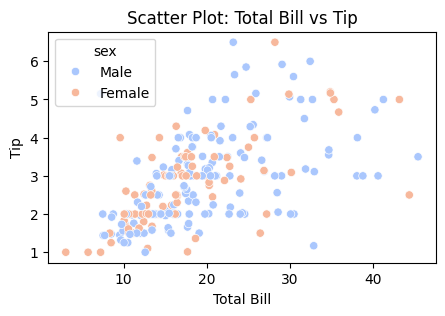

In [13]:
# 3. Visualizations using Matplotlib and Seaborn

# Scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(data=data_cleaned, x='total_bill', y='tip', hue='sex', palette='coolwarm')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

/tmp/ipykernel_37196/3340916676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')


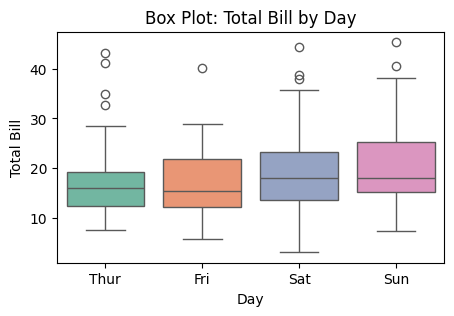

In [15]:
# Box plot
plt.figure(figsize=(5, 3))
sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')
plt.title('Box Plot: Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()